In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Transformed_Housing_Data2.csv")

In [4]:
sale_price=data['Sale_Price'].head(30)
flat_area=data['Flat Area (in Sqft)'].head(30)
sample_data=pd.DataFrame({'sale_price':sale_price, 'flat_area':flat_area})
sample_data

,sale_price,flat_area
0,221900,1180
1,538000,2570
2,180000,770
3,604000,1960
4,510000,1680
5,1129575,5420
6,257500,1715
7,291850,1060
8,229500,1780
9,323000,1890


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


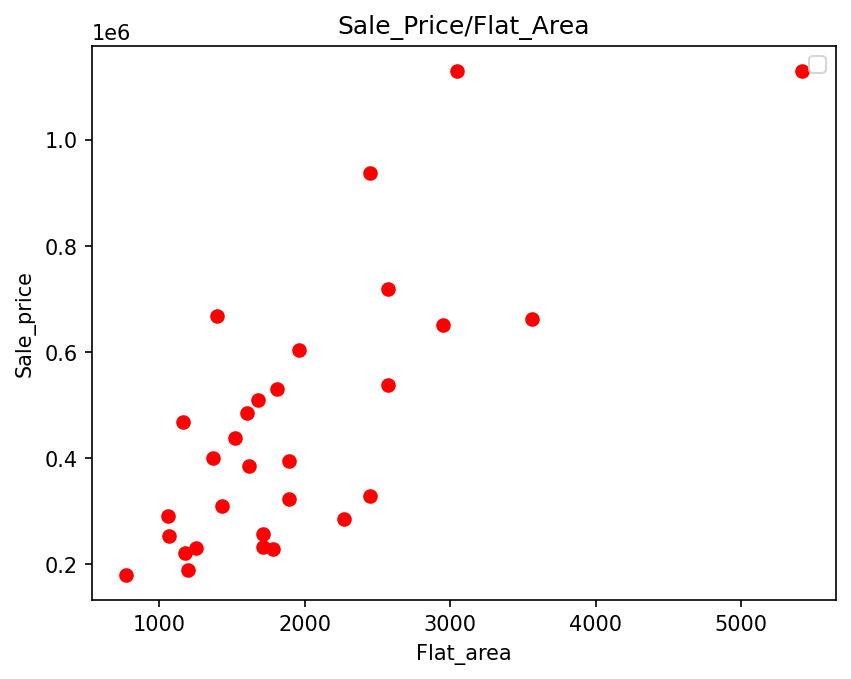

In [8]:
plt.figure(dpi = 150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color='red')
plt.xlabel('Flat_area')
plt.ylabel('Sale_price')
plt.title('Sale_Price/Flat_Area')
plt.legend()
plt.show()

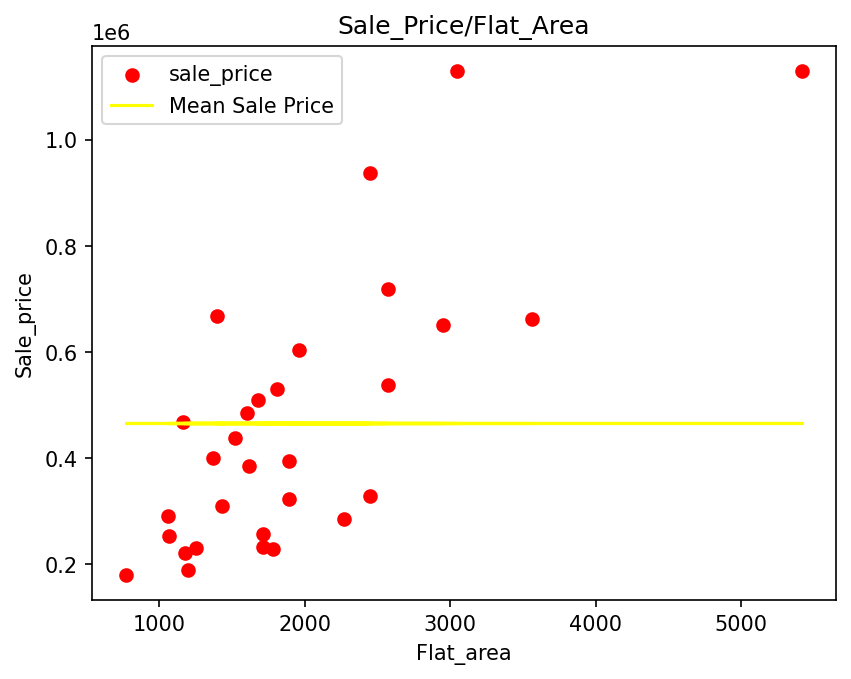

In [10]:
#building mean regression model for the prediction of sale price of the new house
sample_data['mean_sale_price'] = sample_data.sale_price.mean()

plt.figure(dpi = 150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color='red', label='sale_price')
plt.plot(sample_data.flat_area, sample_data.mean_sale_price, color='yellow', label='Mean Sale Price')
plt.xlabel('Flat_area')
plt.ylabel('Sale_price')
plt.title('Sale_Price/Flat_Area')
plt.legend()
plt.show()

COST FUNCTION CURVE:

In [17]:
from sklearn.metrics import mean_squared_error as mse

Text(0.5, 1.0, 'Slope 0 with MSE 281372081125.0')

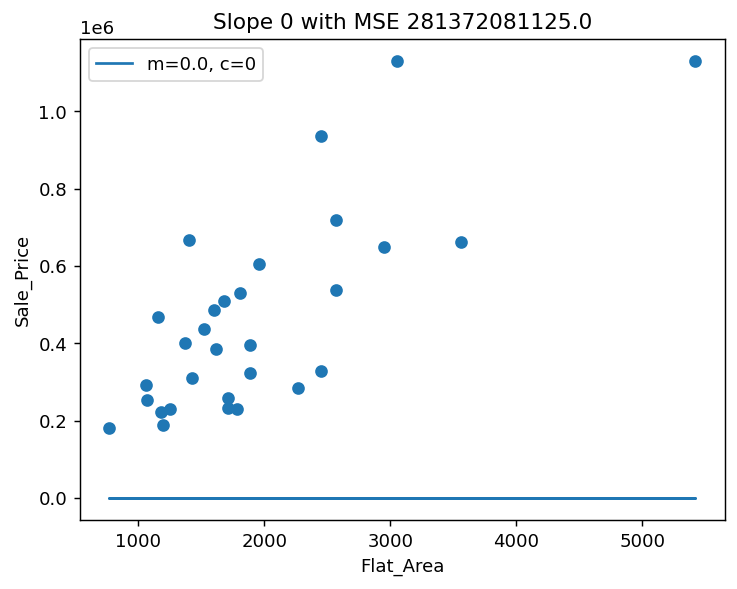

In [19]:
c=0
m=0
line=[]

for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)

plt.figure(dpi=130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label='m=0.0, c=0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE=mse(sample_data.sale_price, line)
plt.title("Slope "+str(m)+" with MSE " +str(MSE))

Text(0.5, 1.0, 'Slope 50 with MSE 184728400708.33334')

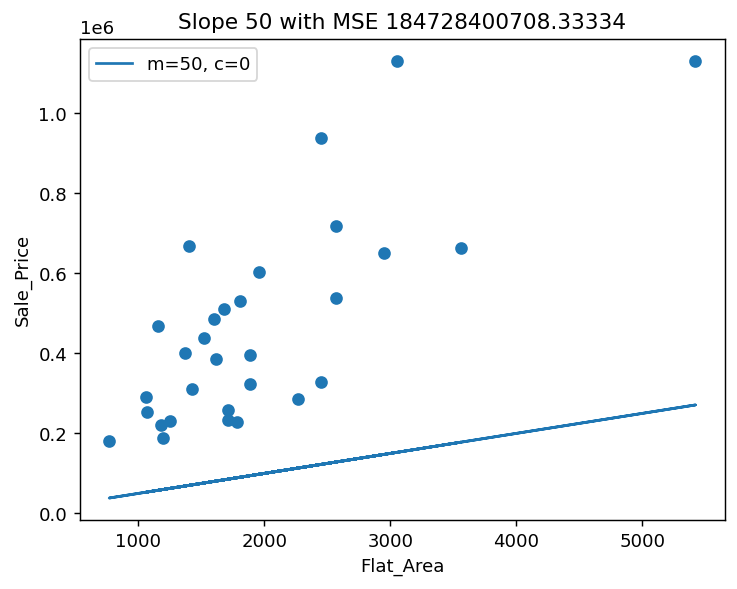

In [20]:
c=0
m=50
line=[]

for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)

plt.figure(dpi=130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label='m=50, c=0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE=mse(sample_data.sale_price, line)
plt.title("Slope "+str(m)+" with MSE " +str(MSE))

In [21]:
def slope_Error(slope, intercept, sample_data):
    sale=[]
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE=mse(sample_data.sale_price, sale)
    return MSE

In [22]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_Error(slope = i, intercept = 0, sample_data = sample_data)
    Cost.append(cost)

In [23]:
#Arranging the data in a dataframe
Cost_table = pd.DataFrame({ 'slope' : slope, 'Cost' : Cost})
Cost_table

,slope,Cost
0,0.0,2.813721e+11
1,0.1,2.811558e+11
2,0.2,2.809395e+11
3,0.3,2.807234e+11
4,0.4,2.805073e+11
...,...,...
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11


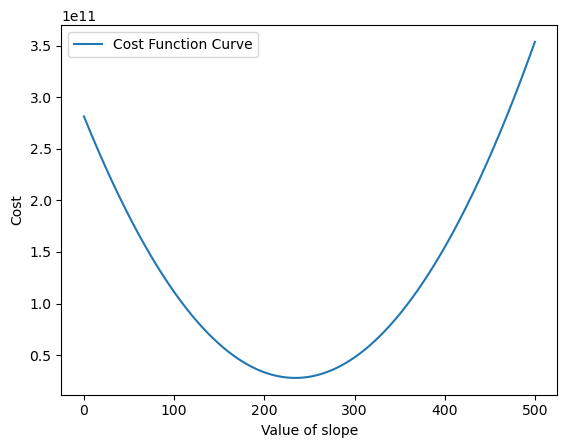

In [24]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [25]:
def intercept_Error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [26]:
intercept = [i for i in range(5000, 50000) ]
Cost = []
for i in intercept:
    cost=intercept_Error(slope=234, intercept=i, sample_data=sample_data)
    Cost.append(cost)

In [27]:
Cost_table2 = pd.DataFrame({ 'intercept' : intercept, 'Cost' : Cost})
Cost_table2

,intercept,Cost
0,5000,2.779911e+10
1,5001,2.779909e+10
2,5002,2.779908e+10
3,5003,2.779907e+10
4,5004,2.779906e+10
...,...,...
44995,49995,2.929862e+10
44996,49996,2.929870e+10
44997,49997,2.929878e+10
44998,49998,2.929886e+10


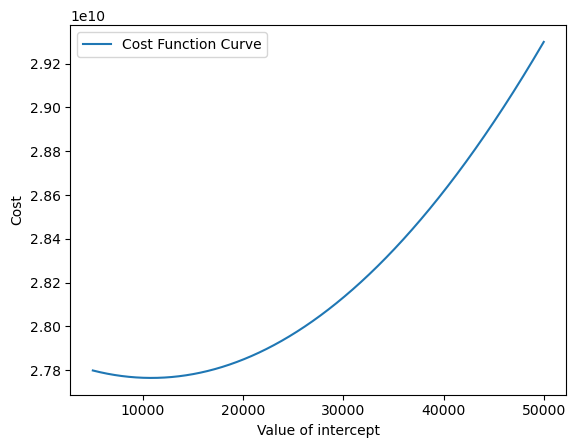

In [31]:
plt.plot(Cost_table2.intercept, Cost_table2.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [36]:
new_slope= Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_slope[0]

234.3

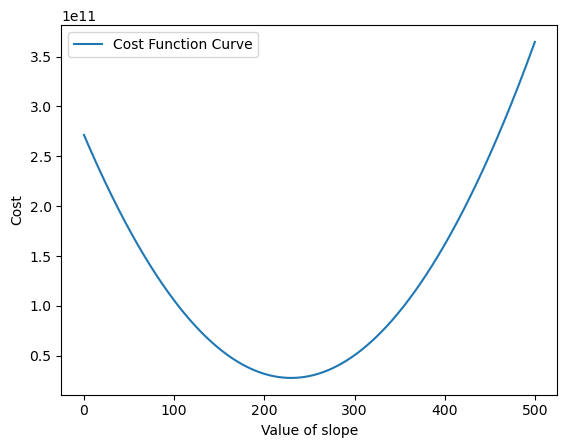

In [38]:
# changing intercept
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_Error(slope = i, intercept = 10834, sample_data = sample_data)
    Cost.append(cost)
    
#Arranging the data in a dataframe
Cost_table = pd.DataFrame({ 'slope' : slope, 'Cost' : Cost})
Cost_table

# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [39]:
new_slope= Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_slope[0]

229.7

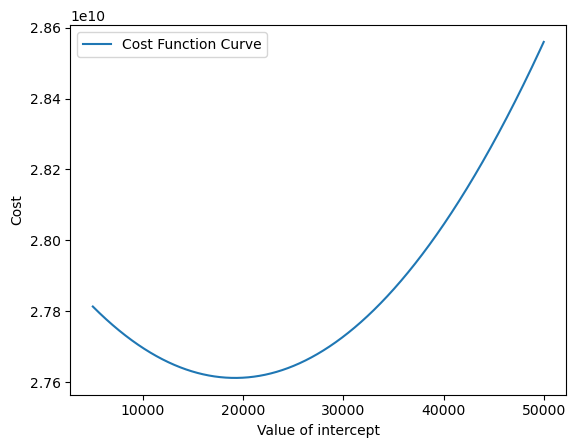

In [40]:
#changing slope to get the intercept
intercept = [i for i in range(5000, 50000) ]
Cost = []
for i in intercept:
    cost=intercept_Error(slope=229.7, intercept=i, sample_data=sample_data)
    Cost.append(cost)
    
Cost_table2 = pd.DataFrame({ 'intercept' : intercept, 'Cost' : Cost})
Cost_table2

plt.plot(Cost_table2.intercept, Cost_table2.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [41]:
new_intercept= Cost_table2['intercept'][Cost_table2['Cost'] == Cost_table2['Cost'].min()].values
new_intercept[0]

19199